CS6421 Deep Learning Final Assignment

Student Name : Suhani

Student Number : 119220491

Course Title : MSc Data Science & Analytics 2019-20

Submitted to : Dr. Gregory Provan, Department of Computer Science, UCC

Basic Encoder Set Up

**Step1: Importing the required libraries**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

**Step2: Defining the Encoder with the help of code provided in assignment Description**

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

**Step 3: Defining the Decoder Layer**

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

**Step 4: Building Auto encoder Model with the help of encoder and decoder layer**

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Step 5:Reconstructing Error**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Step 6: Forward Pass and optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Step 7: The training Loop (This function will take arguments for the model, the optimization function, the loss, the dataset, and the training epochs.)**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Step 8: Process the dataset**

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

**Step 9 : Train the model : In this case I am running the same basic model that has been given in the assignment description just to check how it goes.**

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 20)

Epoch 1/20. Loss: 9.086944580078125
Epoch 2/20. Loss: 5.64708137512207
Epoch 3/20. Loss: 5.073422908782959
Epoch 4/20. Loss: 4.848333835601807
Epoch 5/20. Loss: 4.713678359985352
Epoch 6/20. Loss: 4.555273056030273
Epoch 7/20. Loss: 4.517943382263184
Epoch 8/20. Loss: 4.424166679382324
Epoch 9/20. Loss: 4.391009330749512
Epoch 10/20. Loss: 4.396010398864746
Epoch 11/20. Loss: 4.3539910316467285
Epoch 12/20. Loss: 4.308435916900635
Epoch 13/20. Loss: 4.308469295501709
Epoch 14/20. Loss: 4.301108360290527
Epoch 15/20. Loss: 4.250950813293457
Epoch 16/20. Loss: 4.282020568847656
Epoch 17/20. Loss: 4.320776462554932
Epoch 18/20. Loss: 4.2418999671936035
Epoch 19/20. Loss: 4.2275190353393555
Epoch 20/20. Loss: 4.2601165771484375


**Step 10: Plotting the training performance**

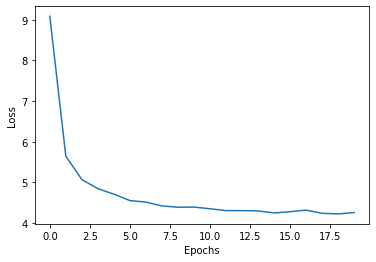

In [0]:
plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Step 11: Looking at Predictions**

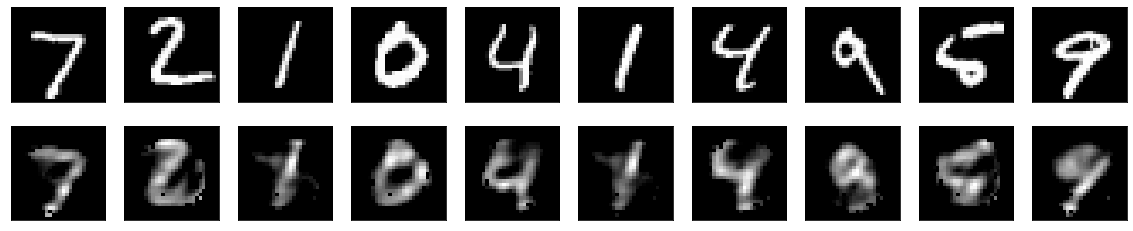

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Assignment Part 1:**

Now I am proceeding with the first part of the assignment. As can be observed above the classified images are quite blurry and there is a space for improvement in model technique. Proceeding with structure of assignment, I will prepare 3 Dense architectures and 2 CNN architectures to try and achieve better reconstruction.

**Generating results for 3 different Dense architectures and summarising the impact of architecture on performance**

** 1. 64 neuron and learning rate 1e-3 and 1 hidden layer**

In [0]:
model_a = Autoencoder(intermediate_dim=64, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model_a, opt, loss, training_dataset,100)

Epoch 1/100. Loss: 10.30810546875
Epoch 2/100. Loss: 5.448929309844971
Epoch 3/100. Loss: 4.676645755767822
Epoch 4/100. Loss: 4.265511989593506
Epoch 5/100. Loss: 3.9900121688842773
Epoch 6/100. Loss: 3.844315528869629
Epoch 7/100. Loss: 3.734903335571289
Epoch 8/100. Loss: 3.6449337005615234
Epoch 9/100. Loss: 3.5688745975494385
Epoch 10/100. Loss: 3.5036814212799072
Epoch 11/100. Loss: 3.4478256702423096
Epoch 12/100. Loss: 3.4005894660949707
Epoch 13/100. Loss: 3.359738349914551
Epoch 14/100. Loss: 3.3223466873168945
Epoch 15/100. Loss: 3.2877302169799805
Epoch 16/100. Loss: 3.256091594696045
Epoch 17/100. Loss: 3.2281975746154785
Epoch 18/100. Loss: 3.204252004623413
Epoch 19/100. Loss: 3.183316707611084
Epoch 20/100. Loss: 3.1643834114074707
Epoch 21/100. Loss: 3.1480751037597656
Epoch 22/100. Loss: 3.1335957050323486
Epoch 23/100. Loss: 3.1210317611694336
Epoch 24/100. Loss: 3.1099555492401123
Epoch 25/100. Loss: 3.0999107360839844
Epoch 26/100. Loss: 3.0906994342803955
Epoch 27

**Observing the Predictions:**

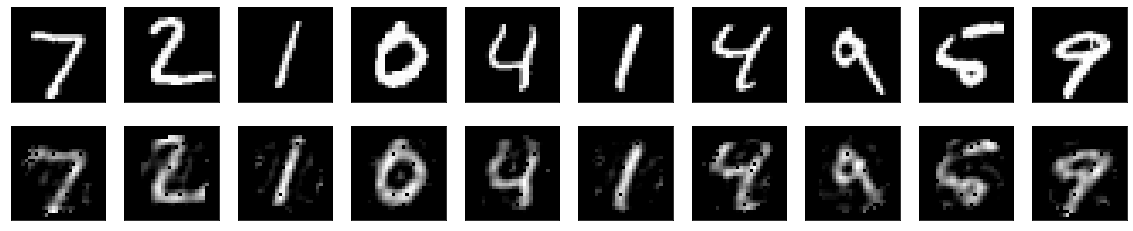

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model_a(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Observation: **
As can be seen from prediction this model has worked better than the basic 
model but this is also evident that it can be tried further to more improvement.

**2) 256  neurons,learning rate to 1e-3 and epochs =100 with one hidden layer** trying this architecture

In [0]:
model1 = Autoencoder(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model1, opt, loss, training_dataset,100)

Epoch 1/100. Loss: 6.0537896156311035
Epoch 2/100. Loss: 2.546625852584839
Epoch 3/100. Loss: 2.124668836593628
Epoch 4/100. Loss: 1.9049351215362549
Epoch 5/100. Loss: 1.7759517431259155
Epoch 6/100. Loss: 1.6881012916564941
Epoch 7/100. Loss: 1.6168551445007324
Epoch 8/100. Loss: 1.571051001548767
Epoch 9/100. Loss: 1.533079743385315
Epoch 10/100. Loss: 1.491823673248291
Epoch 11/100. Loss: 1.460471272468567
Epoch 12/100. Loss: 1.44093918800354
Epoch 13/100. Loss: 1.4068056344985962
Epoch 14/100. Loss: 1.390852928161621
Epoch 15/100. Loss: 1.3868677616119385
Epoch 16/100. Loss: 1.3624588251113892
Epoch 17/100. Loss: 1.3424450159072876
Epoch 18/100. Loss: 1.335691213607788
Epoch 19/100. Loss: 1.3222503662109375
Epoch 20/100. Loss: 1.3063026666641235
Epoch 21/100. Loss: 1.3107774257659912
Epoch 22/100. Loss: 1.2967380285263062
Epoch 23/100. Loss: 1.281394124031067
Epoch 24/100. Loss: 1.2786141633987427
Epoch 25/100. Loss: 1.2676979303359985
Epoch 26/100. Loss: 1.265911340713501
Epoch 2

Plotting output for ist deep dense architecture intermediate dimension=256, learning rate =1e-3 and epochs=100

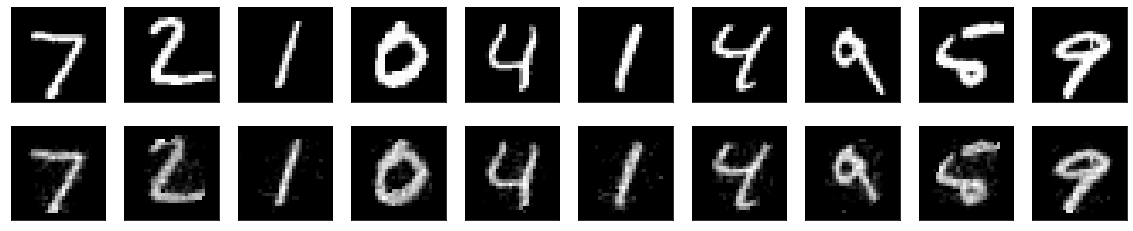

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Observation:** Loss has decreased and reconstruction is more clear. than first deep dense architecture. May be i can try adding 2 more hidden layer to the basic architecture and observe the output.

**Step 12: Modifying encoder to add two more hidden layer**

In [0]:
class EncoderExtra(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(EncoderExtra, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        #adding two more hidden layer to analyse impact
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

**Step 13: Modifying decoder to decode the added hidden layer.**

In [0]:
class DecoderExtra(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(DecoderExtra, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

**Step 14: Autoencoder modification**

In [0]:
class AutoencoderExtra(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(AutoencoderExtra, self).__init__()
    self.loss = []
    self.EncoderExtra = EncoderExtra(intermediate_dim=intermediate_dim)
    self.DecoderExtra = DecoderExtra(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.EncoderExtra(input_features)
    reconstructed = self.DecoderExtra(code)
    return reconstructed

**Step 15:Training Deep dense model for two added hidden layer:**

In [0]:
model2 = AutoencoderExtra(intermediate_dim=256,original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 6.026381492614746
Epoch 2/100. Loss: 2.4769515991210938
Epoch 3/100. Loss: 2.064121723175049
Epoch 4/100. Loss: 1.8453112840652466
Epoch 5/100. Loss: 1.7185282707214355
Epoch 6/100. Loss: 1.6228561401367188
Epoch 7/100. Loss: 1.556357741355896
Epoch 8/100. Loss: 1.5010120868682861
Epoch 9/100. Loss: 1.462260127067566
Epoch 10/100. Loss: 1.425182819366455
Epoch 11/100. Loss: 1.3903127908706665
Epoch 12/100. Loss: 1.3702781200408936
Epoch 13/100. Loss: 1.3504728078842163
Epoch 14/100. Loss: 1.3329118490219116
Epoch 15/100. Loss: 1.3205339908599854
Epoch 16/100. Loss: 1.2984871864318848
Epoch 17/100. Loss: 1.2854154109954834
Epoch 18/100. Loss: 1.2730839252471924
Epoch 19/100. Loss: 1.2678613662719727
Epoch 20/100. Loss: 1.2540637254714966
Epoch 21/100. Loss: 1.2552499771118164
Epoch 22/100. Loss: 1.2341125011444092
Epoch 23/100. Loss: 1.2224868535995483
Epoch 24/100. Loss: 1.2231276035308838
Epoch 25/100. Loss: 1.2197729349136353
Epoch 26/100. Loss: 1.2027920484542847


**Prediction on 2nd deep dense Architecture:**

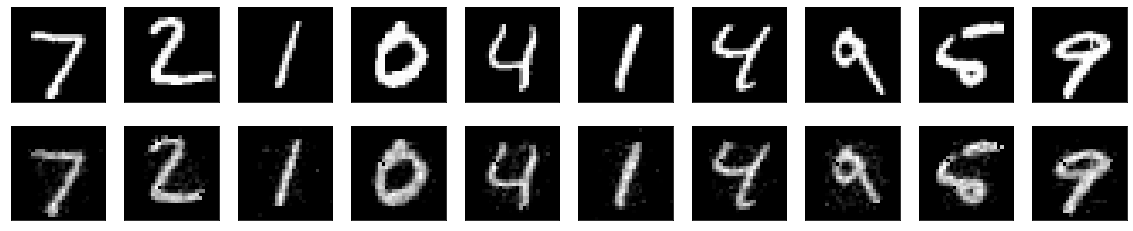

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Compairing Deep dense Architectures developed:**

**Observation:**

1. Model: (model_a)-
    64 neurons , 1 hidden layer,learning rate =1e-3,epoch=100,loss(Binary_cross_entropy)=2.83
2. Model : model1-
    256 neurons, 1 hidden layer, learning rate =1e-3, epoch =100,loss(Binary_cross_entropy)=0.99431
3. Model: model2-
    256 neurons, 3 hidden layer,learning rate =1e-3,epoch =100, loss((Binary_cross_entropy)= 1.06089

**Conclusion:**
1. Decreasing learning rate to 1e-3:As learning rate is hyperparmeter which controls the rate at which model learns.A smaller learning rate is  allowing the model to learn a more optimal or even globally optimal set of weights but taking significantly longer to train.
2. Adding extra hidden layer has no significantly good impact on Model . We can notice from above observation that (model_a) and model 3 ,256 neurons with one hidden layer has less loss than 256 neurons with 3 hidden layers .
3. Adding increased units of neurons to certain extent, is helping model to reduce loss (Binary_cross entropy loss) and improve image clarity. As we can observe by compairing (model1 and model_a)
loss has significantly decreased from 2.83 to 0.932
But,it has been observed that with large excess of nodes  network becomes a memory bank that can recall the training set to perfection.

**CNN Model Basic:**

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#now 28*28*16
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#now 14*14*16
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#now 14*14*8
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
# now 7*7*8
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#now 7*7*8
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
# now 4*4*8
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

**Step 16: Training the CNN Basic Model:**

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**CNN Basic Model fitting:**

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0856 - val_loss: 0.0846
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0855 - val_loss: 0.0850
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0855 - val_loss: 0.0847
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0851
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0843
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0844
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0843
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0853 - val_loss: 0.0843
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0853 - val_loss: 0.0845
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0853 - val_lo

**Plotting Predictions for Basic CNN Model:**


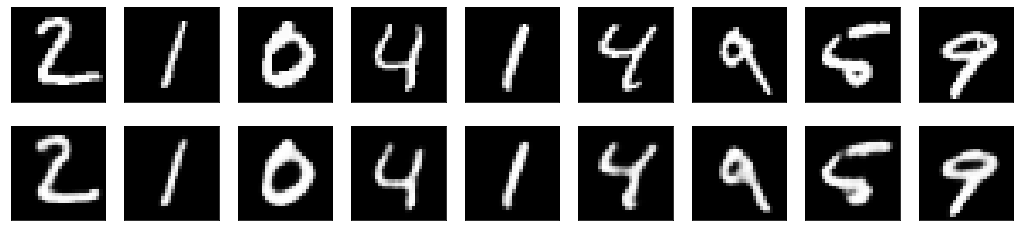

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**CNN Complex Model 1 fitting:**
changing convolutional layer and batch size to 64

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
#changing convultuion to 64
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
#now 28*28*64
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#now 14*14*64
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#now 14*14*32
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
# now 7*7*32
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#now 7*7*16
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 4, 4, 32)          0  

Training the CNN complex Model with changes:

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1259 - val_loss: 0.0946
Epoch 2/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0892 - val_loss: 0.0840
Epoch 3/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0832 - val_loss: 0.0814
Epoch 4/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0802 - val_loss: 0.0786
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0781 - val_loss: 0.0765
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0768 - val_loss: 0.0752
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0756 - val_loss: 0.0746
Epoch 8/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0748 - val_loss: 0.0737
Epoch 9/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0741 - val_loss: 0.0732
Epoch 10/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0735 - val_lo

Predictions for CNN complex model:

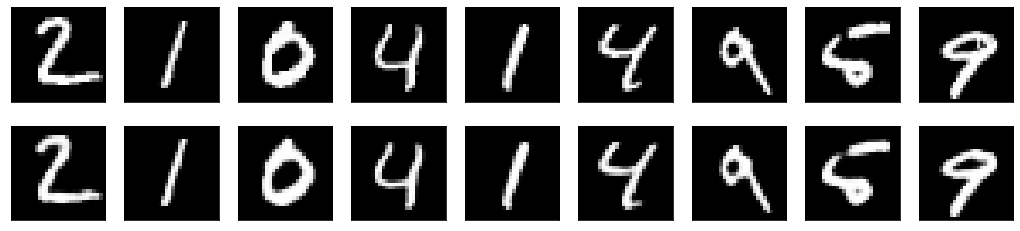

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**CNN Model 2 fitting:**

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
#now 28*28*16
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#now 14*14*16
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#now 14*14*8
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
# now 7*7*8
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#now 7*7*8
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 4, 4, 64)          0  

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0641 - val_loss: 0.0638
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0641 - val_loss: 0.0640
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0641 - val_loss: 0.0639
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0640 - val_loss: 0.0647
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0640 - val_loss: 0.0637
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0640 - val_loss: 0.0637
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0640 - val_loss: 0.0639
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0639 - val_loss: 0.0636
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0639 - val_loss: 0.0636
Epoch 10/100
469/469 [==============================] - 6s 13ms/step - loss: 0.063

Prediction on CNN Model 2:

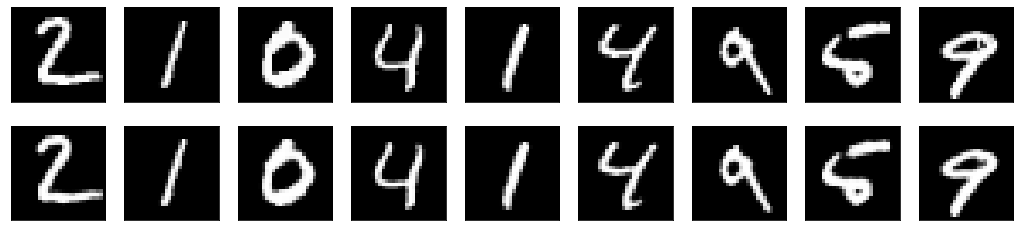

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Results:**
1. CNN Basic Model: (16,8,8) convolutional layers,Binary cross entropy loss: 0.08
2. CNN Model1 : (64,32,32) convolutional layers, Binary cross entropyloss: 0.066
3. CNN Model2: (128,64,64) convolutional layers, Binary cross entriopy loss:0.0627

**Compairing Dense Network and CNN Network**

1. Loss (Binary cross entropy) in case of CNN is very less when compared to Deep Dense network.
2. It can be observed that CNN can detect more of the spatial features compared to Densely Connected Network.
3. In CNN,the pixel values of neighboring cells do not vary highly, But when this image are passed to a Densely Connected Neural network for training the spatial relations between neighboring pixels is lost as all other cells can heavily influence the training whereas in Convolutional networks due to operation of convolution, local information is preserved.
4. Increasing convolution layers from (16,8,8) to (128,64,64) as shown above,resulting in increase in performance of the model.
5. It is observed that smaller batch sizes not only has faster training dynamics but also generalization to the test dataset versus larger batch sizes. The reason for better generalization is vaguely attributed to the existence to “noise” in small batch size training.I have used batch size of 64 in complex CNN model as compared to basic model which had 128 batch size.
Performance of model has improved and loss decreased from 0.0896 to 0.0744
6. Increasing Number of Epoch to 100 does not result in any significant increase in performance of the CNN model.
7. CNN allow parameter sharing which results in a very optimized network compared to using Dense layers.

**Assignment : Part 2**

**Denoising Autoencoder**

**Adding gausian noise to data**

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

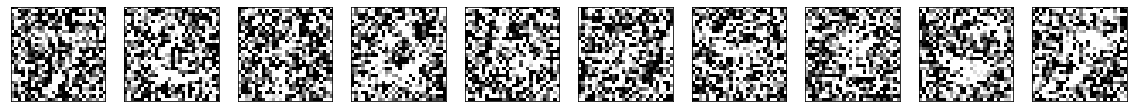

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Basic deep dense network for denoising:**

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train),784))
x_test = np.reshape(x_test, (len(x_test),784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = x_train_noisy.astype(np.float32)
x_test_noisy = x_test_noisy.astype(np.float32)
#reshaping data
x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(256, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               201488    
Total params: 484,880
Trainable params: 484,880
Non-trainable params: 0
____________________________________________________

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2434 - val_loss: 0.2088
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1988 - val_loss: 0.1926
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1875 - val_loss: 0.1837
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1810 - val_loss: 0.1790
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1768 - val_loss: 0.1755
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1740 - val_loss: 0.1737
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1711 - val_loss: 0.1730
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1689 - val_loss: 0.1709
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1667 - val_loss: 0.1693
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1649 - val_lo

Predictions:

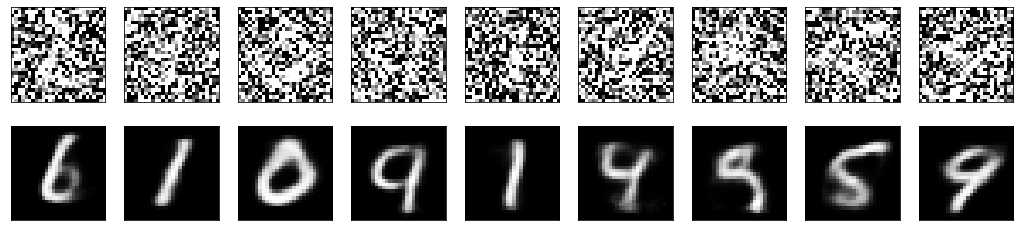

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Basic Convolution network for denoising**

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

This will train for 100 Epoch

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2705 - val_loss: 0.2357
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2262 - val_loss: 0.2170
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2140 - val_loss: 0.2093
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2082 - val_loss: 0.2047
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2048 - val_loss: 0.2019
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2019 - val_loss: 0.2007
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1999 - val_loss: 0.1981
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1982 - val_loss: 0.1969
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1965 - val_loss: 0.1954
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1952 - val_lo

Predictions:

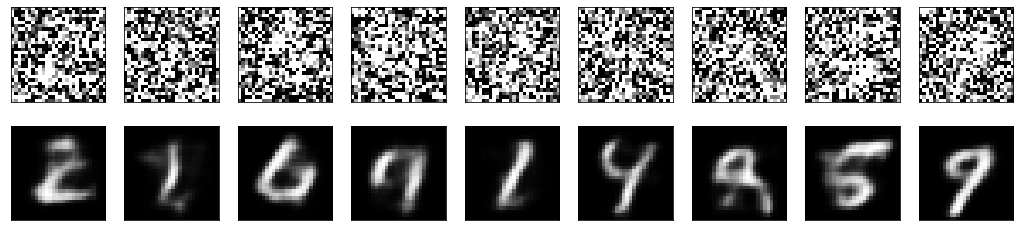

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**CNN complex model:**

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2921 - val_loss: 0.2477
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2374 - val_loss: 0.2301
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2234 - val_loss: 0.2176
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2143 - val_loss: 0.2098
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2081 - val_loss: 0.2039
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2029 - val_loss: 0.1999
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1992 - val_loss: 0.1966
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1966 - val_loss: 0.1941
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1945 - val_loss: 0.1926
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1928 - val_lo

Prediction on CNN Model 32,8,8

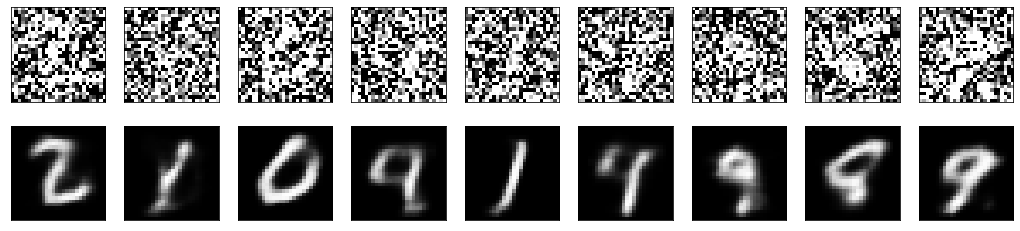

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**CNN Complex model for denoising:**

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 32)          0  

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2732 - val_loss: 0.2487
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2357 - val_loss: 0.2268
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2166 - val_loss: 0.2042
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2010 - val_loss: 0.1944
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1941 - val_loss: 0.1898
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1897 - val_loss: 0.1876
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1870 - val_loss: 0.1849
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1847 - val_loss: 0.1844
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1829 - val_loss: 0.1824
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1808 - val_l

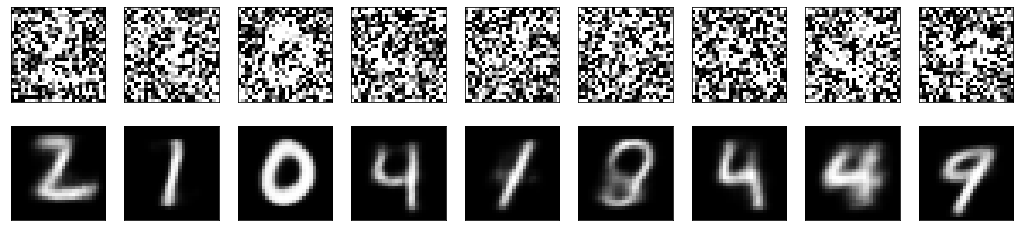

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Results:**
1. Dense, multi-layer model: (256 neurons (1st layer),128 neurons(2nd layer) in encoding as well as in decoding), loss obtained: 0.1715 (Binary_cross_entropy)
2. CNN Basic Model: convolution (16,8,8) (3 layers each) for encoding as well as decoding was used.Loss obtained.loss obtained :0.1737(Binary_cross_entropy)
3. CNN  Model 1: convolution (32,8,8) (3 layers each) for encoding as well as decoding was used.Loss obtained:0.18(Binary_cross_entropy)
3. CNN Complex Model: convolution (64,32,32,16,16) (5 layers each) for encoding as well as decoding has been used . Loss obtained: 0.1697 (Binary_cross entropy)
**Conclusion:**
1. Although loss obtained for CNN complex model is little less than Deep dense Model , by observing the output , we may say that CNN model works comparatively good for denoising of these gray scale Images.
2. It can also be commented that,this deeper autoencoder CNN model actually has a smaller loss value than the shallow autoencoder model.
3. Learning rate for these trainig was also reduced to 1e-3 , so model training took comapratively more time.
4. It can be commented that may be it will take a more complex network compared to what i designed to reduce the loss and denoising the data to great extent. But its preferrable to go for CNN  as per my observation.

**Assignment Part : 3**

**Text Reconstruction Application**

**Importing All Dependencies required for third part of assignment**

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
from subprocess import check_output

**Mounting google drive to acces the data present in my drive**

In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Storing data in variables to use it further**

In [0]:
input_dir  = Path('/content/drive/My Drive/Colab Notebooks/Deep_learning_project')
train = input_dir / 'train'
train_cleaned = input_dir / 'train_cleaned'
test = input_dir / 'test'

**count of training,test and cleaned_train data**

In [0]:
train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))
print("Total number of images in the training set: ", len(train_images))
print("Total number of cleaned images: ", len(train_labels))
print("Total number of samples in the test set: ", len(test_images))

Total number of images in the training set:  144
Total number of cleaned images:  144
Total number of samples in the test set:  72


**Visualizing few samples**

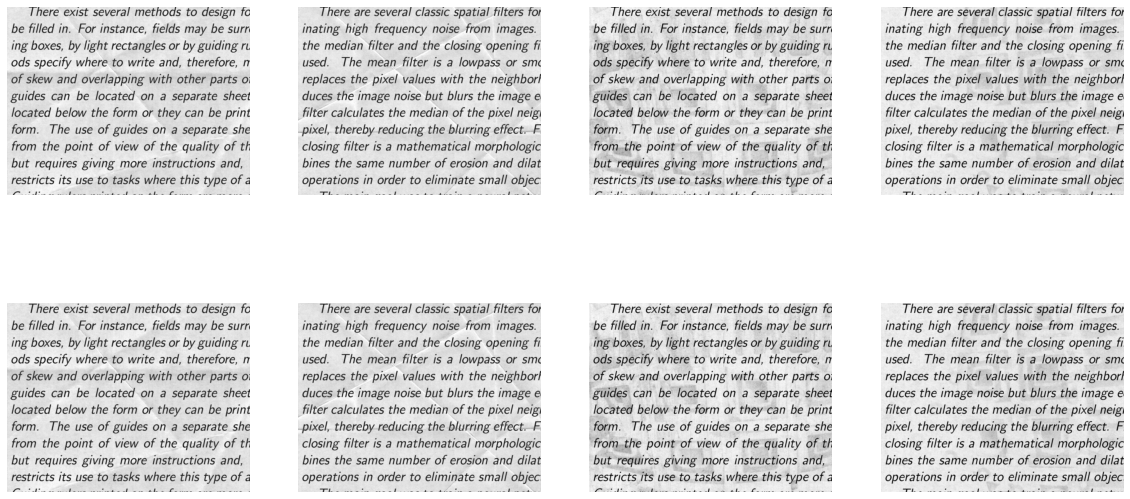

In [0]:
samples = train_images[:4] + train_labels[:4]

f, ax = plt.subplots(2, 4, figsize=(20,10))
for i, img in enumerate(samples):
    img = imread(train/img)
    ax[i//4, i%4].imshow(img, cmap='gray')
    ax[i//4, i%4].axis('off')
plt.show()

**CNN Basic Model for Text Reconstruction:**

**1.Building Autoencoder Basic CNN Model**

In [0]:
def build_autoenocder_basic():
    input_img = Input(shape=(420,540,1), name='image_input')
    #enoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
   #decoder
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv3')(x) 
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [0]:
autoencoder = build_autoenocder_basic()
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 32)      0         
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 420, 540, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 420, 540, 32)      9248      
_________________________________________________________________
Conv3 (Conv2D)               (None, 420, 540, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________

**Modifying code to suit my purpose:**

In [0]:
X = []
Y = []

for img in train_images:
    img = load_img(train / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_cleaned / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

X = np.array(X)
Y = np.array(Y)
print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)


Train/Test Split

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (115, 420, 540, 1)
Total number of validation samples:  (29, 420, 540, 1)


In [0]:
autoencoder.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_valid, y_valid))

Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==============================] - 6s 56ms/step - loss: 0.1729 - val_loss: 0.1102
Epoch 2/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0868 - val_loss: 0.0642
Epoch 3/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0652 - val_loss: 0.0649
Epoch 4/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0670 - val_loss: 0.0640
Epoch 5/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0631 - val_loss: 0.0564
Epoch 6/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0562 - val_loss: 0.0534
Epoch 7/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0512 - val_loss: 0.0460
Epoch 8/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0453 - val_loss: 0.0401
Epoch 9/200
115/115 [==============================] - 2s 13ms/step - loss: 0.0389 - val_loss: 0.0336
Epoch 10/200
115/115 [===============

**Prediction on Basic Model:**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


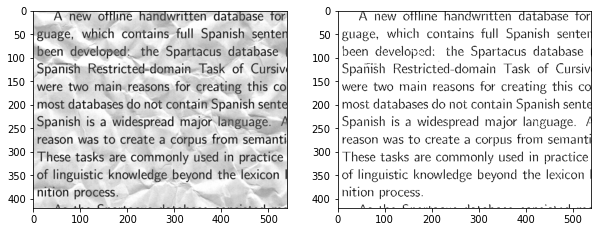

In [0]:
sample_test = load_img(test/ test_images[8], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()

**Builing Autoencoder for Complex CNN Model 1**

In [0]:
def build_autoenocder_cmplx1():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    #decoder
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv3')(x)

    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [0]:
autoencoder = build_autoenocder_cmplx1()
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 64)      640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 64)      0         
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 420, 540, 64)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 420, 540, 64)      36928     
_________________________________________________________________
Conv3 (Conv2D)               (None, 420, 540, 1)       577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
_______________________________________________________

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (115, 420, 540, 1)
Total number of validation samples:  (29, 420, 540, 1)


In [0]:
autoencoder.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_valid, y_valid))

Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==============================] - 13s 113ms/step - loss: 0.1634 - val_loss: 0.0907
Epoch 2/200
115/115 [==============================] - 4s 31ms/step - loss: 0.0730 - val_loss: 0.0638
Epoch 3/200
115/115 [==============================] - 4s 31ms/step - loss: 0.0670 - val_loss: 0.0638
Epoch 4/200
115/115 [==============================] - 4s 31ms/step - loss: 0.0578 - val_loss: 0.0487
Epoch 5/200
115/115 [==============================] - 4s 31ms/step - loss: 0.0458 - val_loss: 0.0378
Epoch 6/200
115/115 [==============================] - 4s 31ms/step - loss: 0.0341 - val_loss: 0.0280
Epoch 7/200
115/115 [==============================] - 4s 32ms/step - loss: 0.0255 - val_loss: 0.0212
Epoch 8/200
115/115 [==============================] - 4s 32ms/step - loss: 0.0204 - val_loss: 0.0173
Epoch 9/200
115/115 [==============================] - 4s 32ms/step - loss: 0.0176 - val_loss: 0.0156
Epoch 10/200
115/115 [=============

**Prediction visualisation on complex model1**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


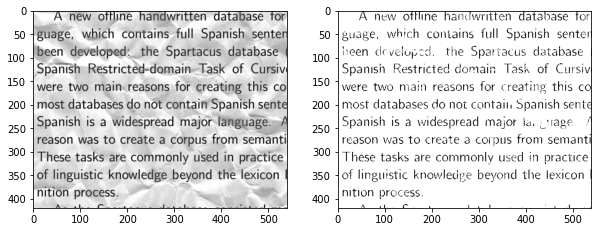

In [0]:
sample_test = load_img(test/ test_images[8], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()

**Building Autoencoder for complex CNN 2 Model:**

In [0]:
def build_autoenocder_cmplx2():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [0]:
autoencoder = build_autoenocder_cmplx2()
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 210, 270, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 105, 135, 64)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 105, 135, 64)      36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 210, 270, 64)      0   

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (115, 420, 540, 1)
Total number of validation samples:  (29, 420, 540, 1)


In [0]:
autoencoder.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_valid, y_valid))

Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==============================] - 5s 48ms/step - loss: 0.1568 - val_loss: 0.0734
Epoch 2/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0798 - val_loss: 0.0814
Epoch 3/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0834 - val_loss: 0.0816
Epoch 4/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 5/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 6/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 7/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 8/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 9/200
115/115 [==============================] - 2s 14ms/step - loss: 0.0835 - val_loss: 0.0816
Epoch 10/200
115/115 [===============

**Prediction visualisation on complex CNN model 2**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


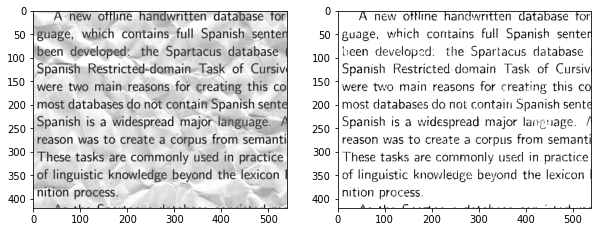

In [0]:
sample_test = load_img(test/ test_images[8], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()

**Conclusion**

1. The advantage of using this CNN model is that the parameters of this model can be optimized through network training.
2. I have observed that the model with 64 convolution, MSE - 0.0022
3. For 32 convolution ,MSE found was -0.0023
4. For convolutional layer of 64 and 32 i did not find significant decrease in
   MSE ,alternatively error is increasing for this model.MSE - 0.0061

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
from subprocess import check_output

In [7]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
input_dir  = Path('/content/drive/My Drive/Deep_learning_project')
train = input_dir / 'train'
train_cleaned = input_dir / 'train_cleaned'
test = input_dir / 'test'

In [9]:
train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))
print("Total number of images in the training set: ", len(train_images))
print("Total number of cleaned images: ", len(train_labels))
print("Total number of samples in the test set: ", len(test_images))

Total number of images in the training set:  144
Total number of cleaned images:  144
Total number of samples in the test set:  72


In [0]:
def build_autoenocder_Dense():
    input_img = tf.keras.layers.Input(shape=(226800,))
    encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
    encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
    decoded= tf.keras.layers.Dense(64, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(226800, activation='sigmoid')(decoded)
    #model
    autoencoder = tf.keras.models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')
    return autoencoder

In [0]:
autoencoder=build_autoenocder_Dense()

In [30]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 226800)]          0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               29030528  
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 226800)            29257200  
Total params: 58,308,464
Trainable params: 58,308,464
Non-trainable params: 0
_______________________________________________

In [31]:
X = []
Y = []

for img in train_images:
    img = load_img(train / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_cleaned / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

X = np.array(X)
Y = np.array(Y)
print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)


In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (115, 420, 540, 1)
Total number of validation samples:  (29, 420, 540, 1)


In [0]:
# Train your model
X_train_flat = np.reshape(X_train, (len(X_train), 226800))
X_valid_flat = np.reshape(X_valid, (len(X_valid), 226800))
Y_train_flat = np.reshape(y_train, (len(y_train), 226800))
Y_valid_flat = np.reshape(y_valid, (len(y_valid), 226800))

In [34]:
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (115, 420, 540, 1)
Total number of validation samples:  (29, 420, 540, 1)


In [35]:
autoencoder.fit(X_train_flat, Y_train_flat, epochs=200, batch_size=20, validation_data=(X_valid_flat, Y_valid_flat))

Epoch 1/200
6/6 [==============================] - 0s 39ms/step - loss: 0.5084 - val_loss: 0.3892
Epoch 2/200
6/6 [==============================] - 0s 31ms/step - loss: 0.3494 - val_loss: 0.3289
Epoch 3/200
6/6 [==============================] - 0s 30ms/step - loss: 0.3212 - val_loss: 0.3213
Epoch 4/200
6/6 [==============================] - 0s 31ms/step - loss: 0.3166 - val_loss: 0.3187
Epoch 5/200
6/6 [==============================] - 0s 32ms/step - loss: 0.3132 - val_loss: 0.3178
Epoch 6/200
6/6 [==============================] - 0s 30ms/step - loss: 0.3071 - val_loss: 0.3047
Epoch 7/200
6/6 [==============================] - 0s 30ms/step - loss: 0.2907 - val_loss: 0.2863
Epoch 8/200
6/6 [==============================] - 0s 31ms/step - loss: 0.2697 - val_loss: 0.2730
Epoch 9/200
6/6 [==============================] - 0s 30ms/step - loss: 0.2543 - val_loss: 0.2573
Epoch 10/200
6/6 [==============================] - 0s 31ms/step - loss: 0.2454 - val_loss: 0.2504
Epoch 11/200
6/6 [=

**Reshaping test data:**

In [0]:
Z= []
for img in test_images:
    img = load_img(test / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Z.append(img)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


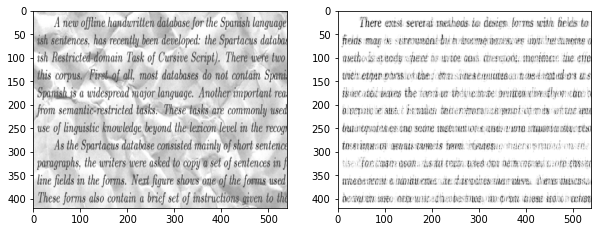

In [0]:
# Compute the prediction
Z = np.array(Z)
Z = np.reshape(Z,(Z.shape[0],226800))
predicted_label = np.squeeze(autoencoder.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(Z[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

**Results:**
1. Output of CNN Basic Model: (32,32) and (64,64) convlutional layers is good and output is differentiable. 
  For  64 convolutional layer : mse loss: 0.0022.
  For  32 convolutional layer : mse loss: 0.0023.
Hence , output is improving with increasing convolution as noticed.
2. Convolutional model : (32,64) convolutional layers :mse loss 0.0066
3. Deep dense network (128,64) neurons in each encoder and decoder layers.
   Mse loss : 0.088
** Conclusion**
 1. CNN is working good for reconstruction of images, hence its more      preferrable.
 2. RMSE found on CNN network sqrt(0.0022)=0.04 
 3. Deep dense network is not working so well with RMSE: 0.29
 4. I have tried heavy architecture like (256,256) nodes each for encoder and decoder as well but found not any significant difference in MSE.

**To conclude i would like to say that:**
Performance of CNN for denoising as well as reconstruction is better than Deep dense network.Due to its superiority in execution and and overall quality of results, the use of CNN in denoising(here gaussian noise) and restoration is preferrable. The restoration problem makes deep CNN especially attractive for the task, which can learn by example based on the optimal (in some sense).
When compared to deep dense, CNN has the principal merits of fast inference and good performance. Denoising on gausssian based noise was efficiently being handled by CNN when compared to Deep dense, but we can't be sure on this comment for real life sophisticated noise.

